# WeatherPy
----



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

633

In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=6e5ded39b4354c0d2c2827fae4ecdbbc&units=Imperial&q=


In [4]:
weather_data = [] 

# Print to logger
print("=============================")
print("Beginning Data Retrieval  ")
print("=============================")

# Create counter
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities): 
    
    # Group cities in sets of 50 for logging purposes
    
    if (i%50==0 and i>=50):
        set_count +=1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    #log the url, record, and set numbers
    print("Processing Record %s of Set %s|%s"%(record_count,set_count,city))
    
    # Add 1 to the record_count 
    record_count +=1
    
    try:
        response = requests.get(query_url + city).json() # Api call
        city_lat = response["coord"]["lat"]
        city_lng = response["coord"]["lat"]
        city_cloudiness = response["clouds"]["all"]
        city_country = response["sys"]["country"]
        city_date = response["dt"]
        city_humidity = response["main"]["humidity"]
        city_max_temp = response["main"]["temp_max"]
        city_windspeed = response["wind"]["speed"]
        weather_data.append({
            "City":city, 
            "Lat":city_lat,
            "Lng":city_lng,
            "Cloudiness":city_cloudiness,
            "Country":city_country,               
            "Date":city_date,
            "Humidity":city_humidity, 
            "Max Temp":city_max_temp, 
            "Wind Speed":city_windspeed })
    except:
        print("City not found. Skipping..")
        pass 

print("===================================")
print("Data Retrieval Complete")
print("===================================")

Beginning Data Retrieval  
Processing Record 1 of Set 1|saldanha
Processing Record 2 of Set 1|tasiilaq
Processing Record 3 of Set 1|punta arenas
Processing Record 4 of Set 1|jamestown
Processing Record 5 of Set 1|vao
Processing Record 6 of Set 1|hermanus
Processing Record 7 of Set 1|bengkulu
City not found. Skipping..
Processing Record 8 of Set 1|butaritari
Processing Record 9 of Set 1|mandera
Processing Record 10 of Set 1|puri
Processing Record 11 of Set 1|victoria
Processing Record 12 of Set 1|new norfolk
Processing Record 13 of Set 1|codrington
Processing Record 14 of Set 1|longyearbyen
Processing Record 15 of Set 1|tura
Processing Record 16 of Set 1|nikolskoye
Processing Record 17 of Set 1|cape town
Processing Record 18 of Set 1|georgetown
Processing Record 19 of Set 1|airai
Processing Record 20 of Set 1|hilo
Processing Record 21 of Set 1|sonoita
Processing Record 22 of Set 1|kobryn
Processing Record 23 of Set 1|port hardy
Processing Record 24 of Set 1|saurimo
Processing Record 25 

Processing Record 41 of Set 4|varhaug
Processing Record 42 of Set 4|hobart
Processing Record 43 of Set 4|meulaboh
Processing Record 44 of Set 4|okahandja
Processing Record 45 of Set 4|virginia beach
Processing Record 46 of Set 4|dhidhdhoo
Processing Record 47 of Set 4|ust-omchug
Processing Record 48 of Set 4|palmar
Processing Record 49 of Set 4|mtsamboro
Processing Record 0 of Set 5|dingle
Processing Record 1 of Set 5|tsihombe
City not found. Skipping..
Processing Record 2 of Set 5|cihuatlan
Processing Record 3 of Set 5|chokurdakh
Processing Record 4 of Set 5|shahrud
Processing Record 5 of Set 5|veraval
Processing Record 6 of Set 5|labuan
Processing Record 7 of Set 5|mount isa
Processing Record 8 of Set 5|hirara
Processing Record 9 of Set 5|sibolga
Processing Record 10 of Set 5|okhotsk
Processing Record 11 of Set 5|kamenskoye
City not found. Skipping..
Processing Record 12 of Set 5|sao felix do xingu
Processing Record 13 of Set 5|hit
Processing Record 14 of Set 5|castro
Processing Reco

Processing Record 39 of Set 8|port blair
Processing Record 40 of Set 8|madimba
Processing Record 41 of Set 8|khasan
Processing Record 42 of Set 8|bikin
Processing Record 43 of Set 8|vaitape
Processing Record 44 of Set 8|nelson bay
Processing Record 45 of Set 8|yumen
Processing Record 46 of Set 8|kalangala
Processing Record 47 of Set 8|satitoa
City not found. Skipping..
Processing Record 48 of Set 8|havre-saint-pierre
Processing Record 49 of Set 8|luau
Processing Record 0 of Set 9|valleyview
Processing Record 1 of Set 9|bulgan
Processing Record 2 of Set 9|rudnyy
Processing Record 3 of Set 9|semnan
Processing Record 4 of Set 9|boffa
Processing Record 5 of Set 9|kpalime
Processing Record 6 of Set 9|mildura
Processing Record 7 of Set 9|ulladulla
Processing Record 8 of Set 9|moranbah
Processing Record 9 of Set 9|tshikapa
Processing Record 10 of Set 9|pogar
Processing Record 11 of Set 9|sholapur
City not found. Skipping..
Processing Record 12 of Set 9|palabuhanratu
City not found. Skipping..

Processing Record 36 of Set 12|kumsi
Processing Record 37 of Set 12|gravdal
Processing Record 38 of Set 12|suba
Processing Record 39 of Set 12|gunjur
Processing Record 40 of Set 12|linares
Processing Record 41 of Set 12|babanusah
City not found. Skipping..
Processing Record 42 of Set 12|lidorikion
City not found. Skipping..
Processing Record 43 of Set 12|acapulco
Processing Record 44 of Set 12|srednekolymsk
Processing Record 45 of Set 12|springbok
Processing Record 46 of Set 12|jacareacanga
Processing Record 47 of Set 12|teguise
Processing Record 48 of Set 12|ayan
Processing Record 49 of Set 12|san patricio
Processing Record 0 of Set 13|naron
Processing Record 1 of Set 13|portsmouth
Processing Record 2 of Set 13|yajalon
Processing Record 3 of Set 13|rio grande
Processing Record 4 of Set 13|manoel urbano
Processing Record 5 of Set 13|porirua
Processing Record 6 of Set 13|solnechnyy
Processing Record 7 of Set 13|urdzhar
City not found. Skipping..
Processing Record 8 of Set 13|salalah
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating DataFrame with the information about the weather for all the cities and printing the top five of them
weather_df = pd.DataFrame(weather_data)
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,saldanha,4,PT,1564271933,67,41.42,41.42,60.18,5.19
1,tasiilaq,75,GL,1564271676,57,65.61,65.61,51.80,1.12
2,punta arenas,0,CL,1564271903,65,-53.16,-53.16,44.60,20.80
3,jamestown,32,AU,1564271922,57,-33.21,-33.21,59.10,10.04
4,vao,0,EE,1564271946,69,59.10,59.10,67.20,3.56


In [6]:
# Show the count of data accquired
weather_df.count()

City          573
Cloudiness    573
Country       573
Date          573
Humidity      573
Lat           573
Lng           573
Max Temp      573
Wind Speed    573
dtype: int64

In [7]:
# Export the data into a csv
weather_df.to_csv(output_data_file, index_label="City_ID")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [8]:
# Converting the datetime for a better format.

date = datetime.datetime.fromtimestamp(int(weather_df["Date"][0])).strftime('%m/%d/%Y')


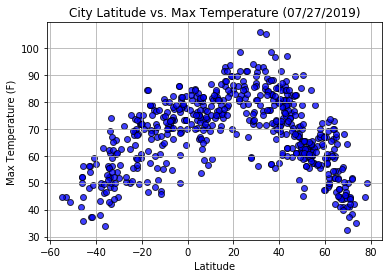

In [9]:
# Building a scatter plot for each data type

plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", facecolors = "blue",edgecolors = "black",
            alpha=0.75, label="Cities", linewidths=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature ({})".format(date))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TemperatureInTheWorld.png")

#### Latitude vs. Humidity Plot

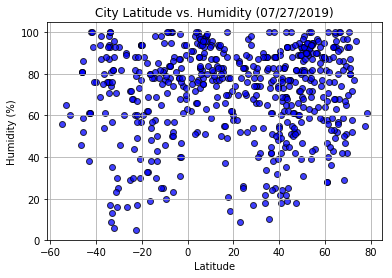

In [10]:
# Building a scatter plot for each data type

plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", facecolors = "blue", edgecolors = "black",
           alpha=0.75, label="Cities", linewidths=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity ({})".format(date))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInTheWorld.png")

#### Latitude vs. Cloudiness Plot

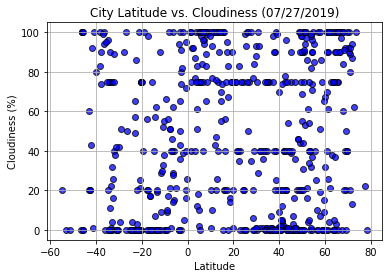

In [11]:
# Building a scatter plot for each data type

plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o",facecolors = "blue", edgecolors = "black",
           alpha=0.75, label="Cities", linewidths=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness ({})".format(date))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInTheWorld.png")

#### Latitude vs. Wind Speed Plot

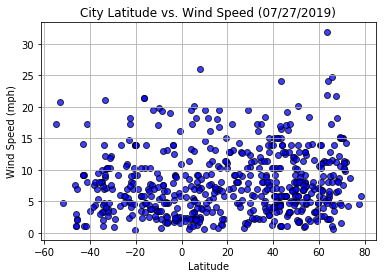

In [12]:
# Building a scatter plot for each data type

plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o",facecolors = "blue", edgecolors = "black",
           alpha=0.75, label="Cities", linewidths=1)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed ({})".format(date)) 
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindSpeedInTheWorld.png")

# Analysis:

1. According to the Max Temperature vs. Latitude scatter plot, although the temperature is higher as we approach to the
equater, the max temperature is higher in the northern hemisphere than the equator region.

2. According to the Humidity vs. Latitude scatter plot, latitude does not seem to have a big impact on Humidity. However, there are more cities with higher humidity toward the northern hemisphere.

3. The Latitude doesn not have a big impact on cloudiness and wind speed.

